
# Name - Siddharth Nair
# Task 2
# MAY2021

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

In [2]:
data = pd.read_csv('iris.csv')

In [3]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
data.shape

(150, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [7]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Visualizing some features 

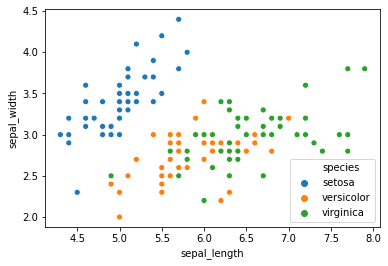

In [8]:
sns.scatterplot(x = data.sepal_length,y=data.sepal_width,hue=data.species)

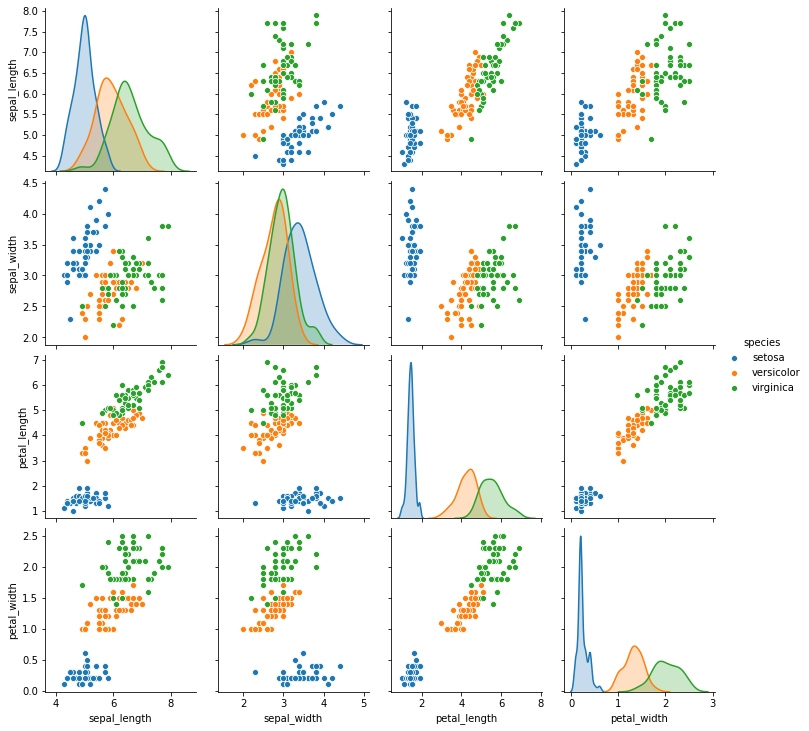

In [9]:
sns.pairplot(data,hue = 'species')

# checking for outliers 

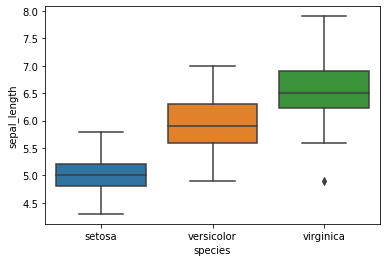

In [10]:
sns.boxplot(x="species",y="sepal_length",data=data)

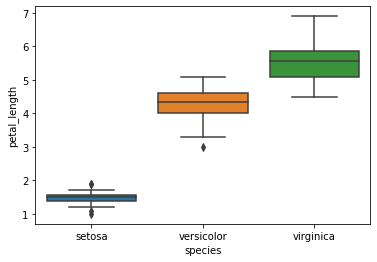

In [11]:
sns.boxplot(x="species",y="petal_length",data=data)

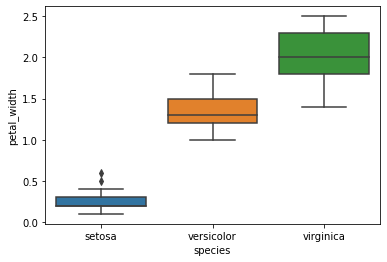

In [12]:
sns.boxplot(x="species",y="petal_width",data=data)

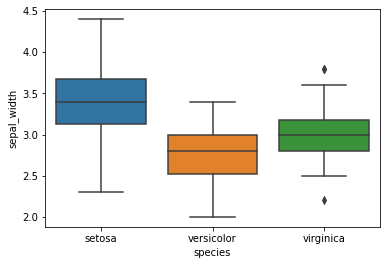

In [13]:
sns.boxplot(x="species",y="sepal_width",data=data)

# Initalize the Model

## Note- As this a small dataset we will not split this to train and test data

In [14]:
X = data.iloc[:,:-1].values


In [15]:

from sklearn.cluster import KMeans
wcss = [] #within-cluster sums of squares
for i in range (1,10):
    model = KMeans(n_clusters=i,init='k-means++',random_state = 42,max_iter=200)
    model.fit(X)
    wcss.append(model.inertia_)

# Elbow Method to find optimum number of clusters

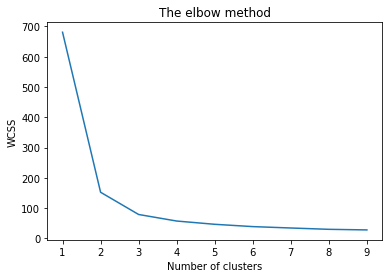

In [16]:
plt.plot(range(1, 10), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

# Hence we can see that k = 3 will be optimum number of clusters

In [17]:
model1 = KMeans(n_clusters=3,random_state=42)

In [18]:
model1.fit(X)

KMeans(n_clusters=3, random_state=42)

In [19]:
output = model1.predict(X)

# Comparing our model

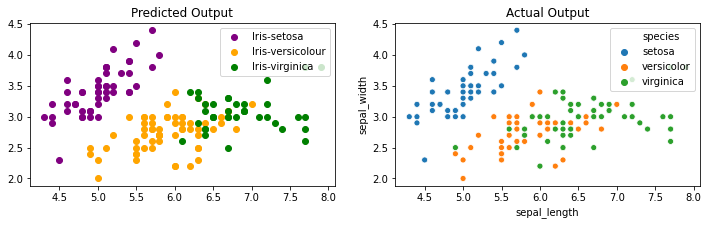

In [20]:
#Visualising the clusters
plt.figure(figsize=(12,3))
plt.subplot(1, 2, 1)
plt.title('Predicted Output')
plt.scatter(X[output == 1, 0], X[output == 1, 1], c = 'purple', label = 'Iris-setosa')
plt.scatter(X[output == 0, 0], X[output == 0, 1],  c = 'orange', label = 'Iris-versicolour')
plt.scatter(X[output == 2, 0], X[output == 2, 1],  c = 'green', label = 'Iris-virginica')
plt.legend()
plt.subplot(1,2,2)
plt.title('Actual Output')
sns.scatterplot(x = data.sepal_length,y=data.sepal_width,hue=data.species)
#Plotting the centroids of the clusters

plt.legend()

# 3D Visualization

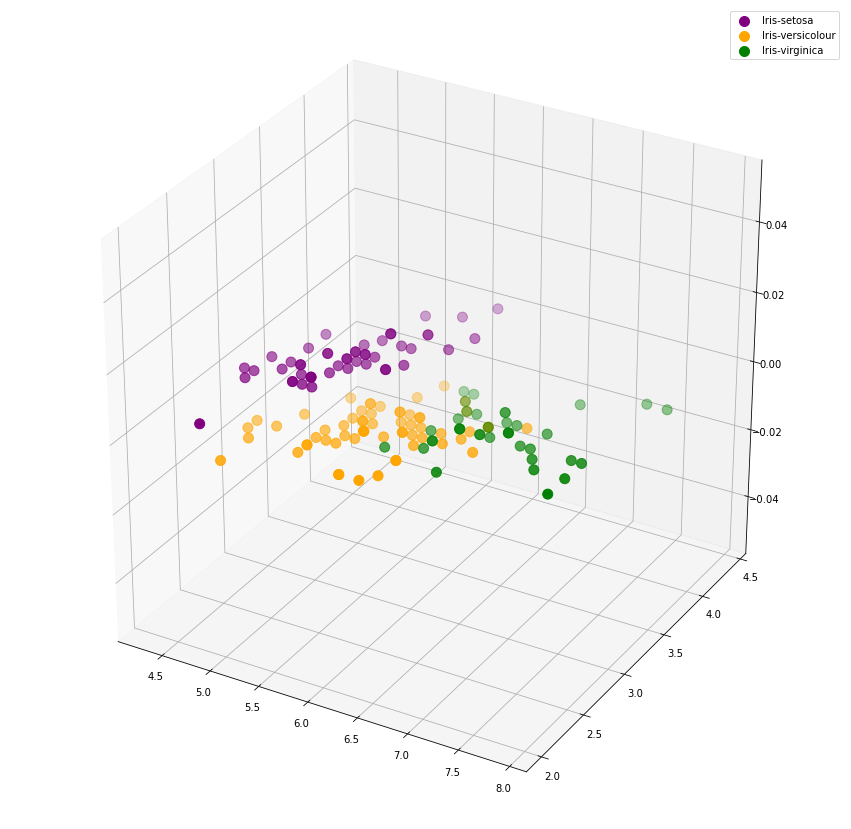

In [21]:

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(X[output == 1, 0], X[output == 1, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(X[output == 0, 0], X[output == 0, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(X[output == 2, 0], X[output == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')


plt.legend()
plt.show()
